## SENTIMENT ANALYSIS

In [2]:
import pandas as pd 
import numpy as np
 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

import nltk
nltk.download('vader_lexicon')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

c:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Loading and Previewing the datasets
merged_sentiments = pd.read_csv('MergedData/merged_sentiments.csv')
merged_sentiments

,text,date,No_of_likes,No_of_tweets
0,Unajua sai amafanya EABL. Anaweza tupea a year...,2024-01-10 10:12:00+00:00,0,1
1,"My apologies Balozi Lager, I wasn't familiar w...",2023-12-26 16:52:00+00:00,0,0
2,"Balozi is low grade packaged White Cap, a prem...",2023-12-12 15:18:00+00:00,27,7
3,Wind down on the 19th Hole with Ed Parseen's b...,2023-11-23 12:03:00+00:00,0,0
4,@EABL_PLC naona mumetengenezea wanywezi wa Bal...,2023-09-28 07:07:00+00:00,0,0
...,...,...,...,...
585,Tusker? Maybe the beer. The beer should rightl...,2023-02-03 10:40:00+00:00,15,5
586,Tusker / EABL will never fall man 😂😂,2023-02-02 20:43:00+00:00,0,0
587,Wewe unakunywa pombe za EABL ama keroche's? Yo...,2023-01-31 23:27:00+00:00,1,0
588,Tusker FC Bank rolled: East African Breweries(...,2023-01-31 13:52:00+00:00,0,1


In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Fill any NaN values in the 'text' column with an empty string
merged_sentiments['text'].fillna('', inplace=True)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the entire 'text' column
merged_sentiments['compound'] = merged_sentiments['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Categorize sentiments based on the compound score
merged_sentiments['sentiment'] = merged_sentiments['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Display the updated dataset with sentiment scores and labels
merged_sentiments.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_11920\30483197.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_sentiments['text'].fillna('', inplace=True)


,text,date,No_of_likes,No_of_tweets,compound,sentiment
0,Unajua sai amafanya EABL. Anaweza tupea a year...,2024-01-10 10:12:00+00:00,0,1,0.0000,Neutral
1,"My apologies Balozi Lager, I wasn't familiar w...",2023-12-26 16:52:00+00:00,0,0,0.0000,Neutral
2,"Balozi is low grade packaged White Cap, a prem...",2023-12-12 15:18:00+00:00,27,7,-0.4215,Negative
3,Wind down on the 19th Hole with Ed Parseen's b...,2023-11-23 12:03:00+00:00,0,0,0.7644,Positive
4,@EABL_PLC naona mumetengenezea wanywezi wa Bal...,2023-09-28 07:07:00+00:00,0,0,0.4404,Positive


The first two rows have a compound score of 0.0000, indicating a neutral sentiment. This means that these texts don't show a strong positive or negative sentiment. Neutral sentiments could be common for general comments or statements that do not express a clear opinion.

The third row has a compound score of -0.4215, categorizing it as a negative sentiment. This suggests that the text contains language conveying a pessimistic or critical tone. Negative sentiments in discussions about the company are important to monitor, as they could indicate concerns or issues that might impact the stock price negatively.

The fourth and fifth rows have positive compound scores (0.7644 and 0.4404), indicating a positive sentiment. These texts likely contain language expressing a favorable or optimistic view. Positive sentiments can be encouraging, suggesting positive sentiment in discussions around the company. This could be associated with potential positive impacts on stock prices.

It's essential to track the overall sentiment trends over time, as shifts in sentiment correlates with changes in stock prices. Therefore, monitoring sentiments can provide insights into public perception, potential market trends, and the impact of news or events on stock prices. It advised to consider aggregating sentiments over different time intervals to identify patterns and correlations with stock price movements.

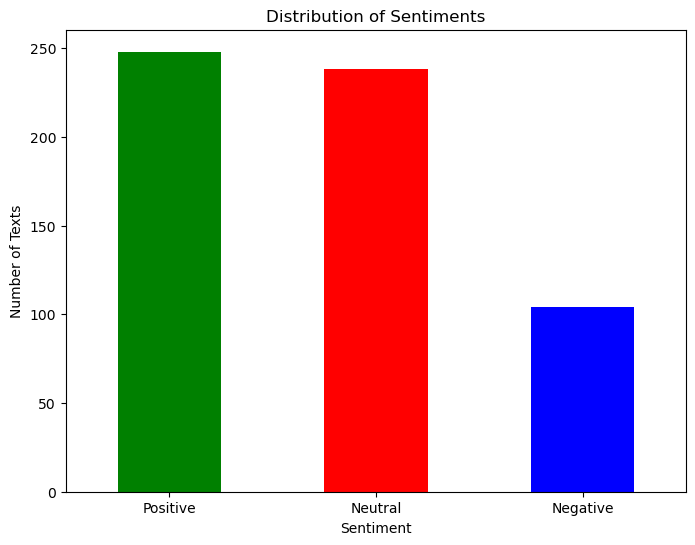

In [5]:

# Count the occurrences of each sentiment
sentiment_counts = merged_sentiments['sentiment'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()

The largest portion of texts in your dataset is classified as positive sentiments. This indicates that a significant number of texts express positive opinions, feelings, or feedback related to East Africa Breweries Limited (EABL). It's encouraging to see a generally positive sentiment.

The neutral sentiments are nearly as prevalent as positive sentiments, suggesting a substantial number of texts that don't strongly lean towards either a positive or negative sentiment. Therefore, nderstanding the context of these neutral texts could provide additional insights into the overall sentiment landscape.

While negative sentiments form a smaller portion compared to positive and neutral sentiments. These texts may contain criticisms, concerns, or negative opinions about EABL. It's therefore essential to pay attention to them as investigating the content of these texts could help identify areas that might need attention or improvement.

The sentiment distribution provides an initial understanding of the sentiments expressed in the texts related to EABL stock. Further analysis, such as diving into the content of specific texts or exploring sentiment trends over time, could offer deeper insights for your stock price prediction project.

#### 2.  How sentiments change over time.

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

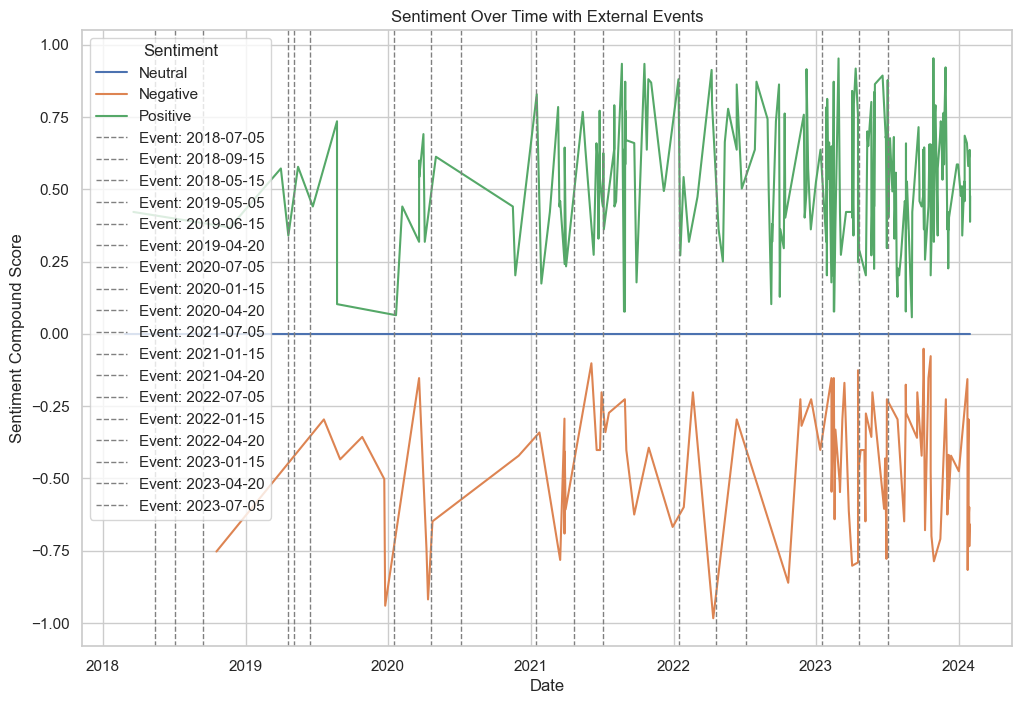

In [6]:
# 'key_dates' is a list of dates identified
key_dates = ['2018-07-05','2018-09-15', '2018-05-15',
             '2019-05-05','2019-06-15','2019-04-20',
             '2020-07-05','2020-01-15','2020-04-20',
             '2021-07-05','2021-01-15','2021-04-20',
             '2022-07-05','2022-01-15','2022-04-20',
             '2023-01-15', '2023-04-20', '2023-07-05']

# Convert 'date' column to datetime
merged_sentiments['date'] = pd.to_datetime(merged_sentiments['date'])

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting sentiment over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='compound', hue='sentiment', data=merged_sentiments)

# Annotate the plot with key dates
for key_date in key_dates:
    plt.axvline(pd.to_datetime(key_date), color='gray', linestyle='--', linewidth=1, label=f'Event: {key_date}')

# Customize the plot
plt.title('Sentiment Over Time with External Events')
plt.xlabel('Date')
plt.ylabel('Sentiment Compound Score')
plt.legend(title='Sentiment')
plt.show()

#### 3. Correlation with Engagement Metrics

Exploring if there's any correlation between sentiment scores and engagement metrics like 'No_of_likes' or 'No_of_tweets'.

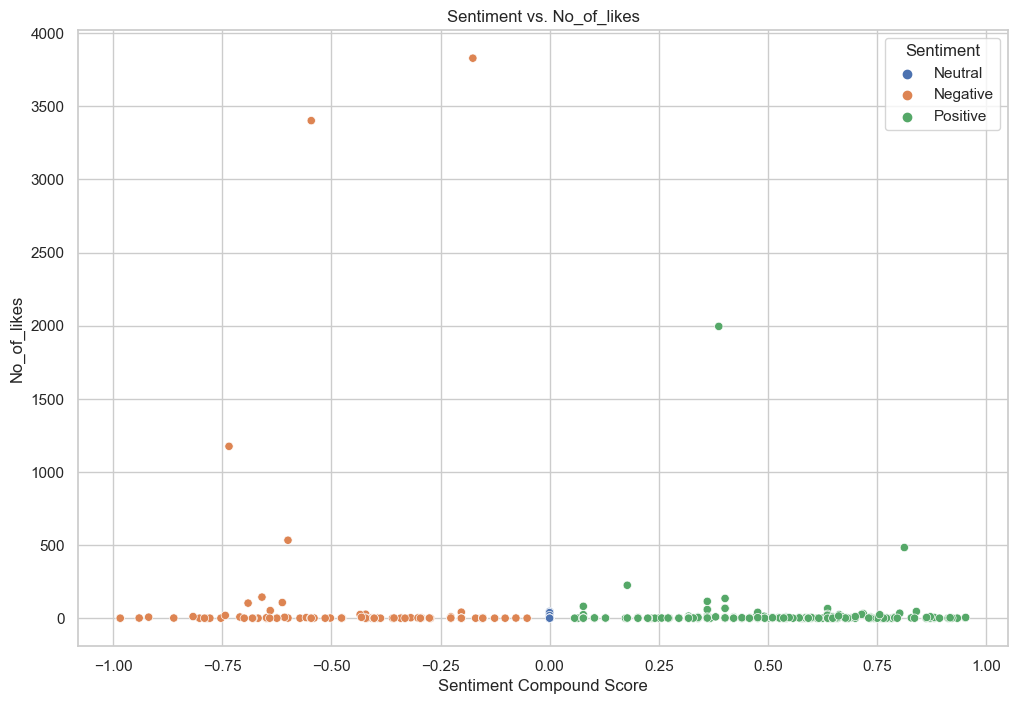

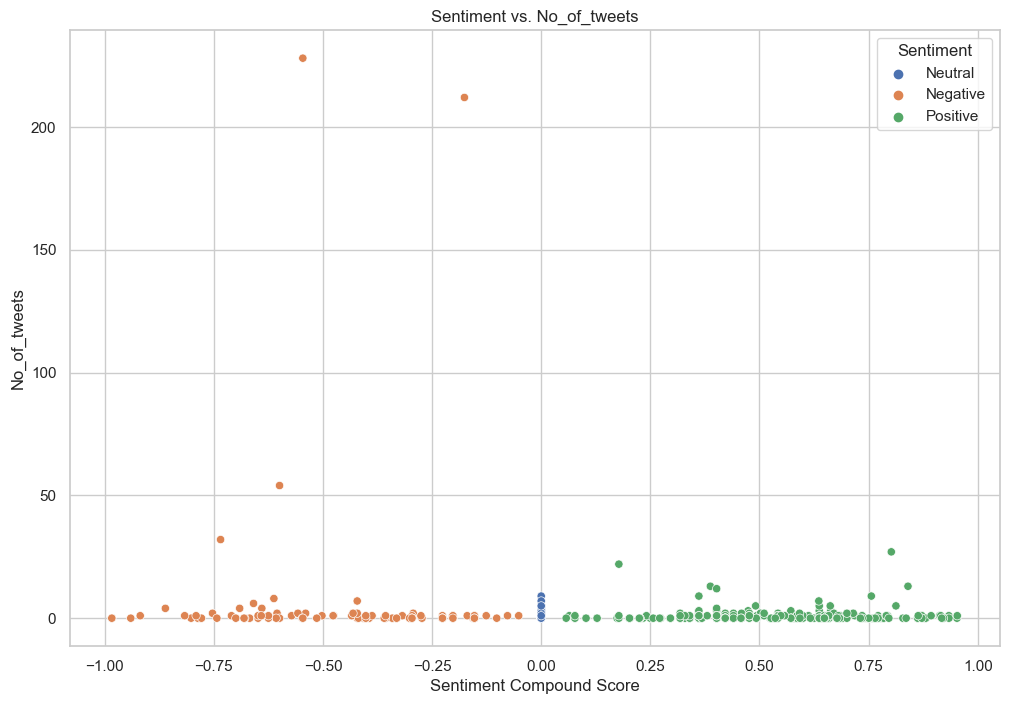

Correlation between Sentiment and No_of_likes: -0.07671733081742979
Correlation between Sentiment and No_of_tweets: -0.08411693897148358


In [7]:
# Set the style for the plot
sns.set(style="whitegrid")

# Scatter plot for sentiment vs. No_of_likes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='compound', y='No_of_likes', hue='sentiment', data=merged_sentiments)
plt.title('Sentiment vs. No_of_likes')
plt.xlabel('Sentiment Compound Score')
plt.ylabel('No_of_likes')
plt.legend(title='Sentiment')
plt.show()

# Scatter plot for sentiment vs. No_of_tweets
plt.figure(figsize=(12, 8))
sns.scatterplot(x='compound', y='No_of_tweets', hue='sentiment', data=merged_sentiments)
plt.title('Sentiment vs. No_of_tweets')
plt.xlabel('Sentiment Compound Score')
plt.ylabel('No_of_tweets')
plt.legend(title='Sentiment')
plt.show()

# Calculate correlation coefficients
correlation_likes = merged_sentiments['compound'].corr(merged_sentiments['No_of_likes'])
correlation_tweets = merged_sentiments['compound'].corr(merged_sentiments['No_of_tweets'])

print(f'Correlation between Sentiment and No_of_likes: {correlation_likes}')
print(f'Correlation between Sentiment and No_of_tweets: {correlation_tweets}')

The correlation coefficients are close to zero, indicating a weak linear relationship between sentiment scores and both 'No_of_likes' and 'No_of_tweets.'
The negative sign suggests a slight negative correlation, but the magnitude is small, indicating that as sentiment scores increase or decrease, there is a minimal impact on the number of likes or tweets.

Overall, these results suggest that there isn't a strong linear relationship between sentiment scores and engagement metrics in this dataset. Other factors or nonlinear relationships may contribute to the variations in likes and tweets.

#### 4. Word Clouds

Generate word clouds for each sentiment category to visualize the most frequent words associated with Positive, Negative, and Neutral sentiments.

Used the word cloud to visually  represent the text data, to display words in different sizes based on their frequency or importance. It provides a quick and intuitive way to identify the most prominent words in a given dataset.

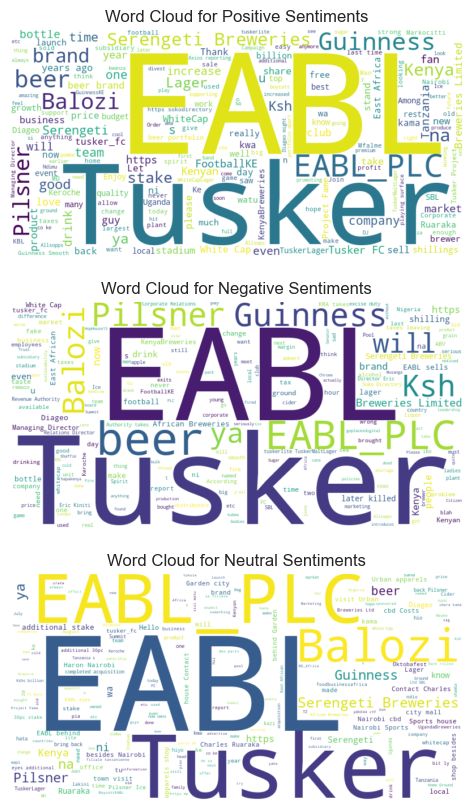

In [8]:
from wordcloud import WordCloud

# Separate texts for each sentiment category
positive_texts = merged_sentiments[merged_sentiments['sentiment'] == 'Positive']['text'].str.cat(sep=' ')
negative_texts = merged_sentiments[merged_sentiments['sentiment'] == 'Negative']['text'].str.cat(sep=' ')
neutral_texts = merged_sentiments[merged_sentiments['sentiment'] == 'Neutral']['text'].str.cat(sep=' ')

# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_texts)

# Plot word clouds for each sentiment category
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiments')
plt.axis('off')

plt.show()

#### 5. Explored topic modeling techniques (e.g., Latent Dirichlet Allocation) to identify common themes or topics within the texts.

In [9]:
from gensim import corpora, models
from pprint import pprint

# Tokenize the text
tokenized_texts = merged_sentiments['text'].apply(lambda x: x.split())

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_texts)

# Convert the tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Build the LDA model with a different number of topics
lda_model_4_topics = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics and associated words for the new model
pprint(lda_model_4_topics.print_topics())

[(0,
  '0.014*"the" + 0.014*"in" + 0.011*"@EABL_PLC" + 0.011*"and" + 0.010*"a" + '
  '0.010*"Tusker" + 0.008*"to" + 0.008*"of" + 0.007*"Ksh" + 0.007*"with"'),
 (1,
  '0.021*"the" + 0.019*"to" + 0.016*"a" + 0.014*"in" + 0.013*"and" + '
  '0.013*"is" + 0.011*"EABL" + 0.011*"of" + 0.010*"Tusker" + '
  '0.010*"@EABL_PLC"'),
 (2,
  '0.023*"the" + 0.015*"to" + 0.012*"EABL" + 0.012*"a" + 0.011*"is" + '
  '0.011*"and" + 0.010*"@EABL_PLC" + 0.010*"I" + 0.008*"Pilsner" + 0.007*"in"'),
 (3,
  '0.023*"the" + 0.023*"of" + 0.019*"to" + 0.018*"EABL" + 0.016*"Breweries" + '
  '0.015*"Serengeti" + 0.011*"in" + 0.009*"its" + 0.009*"stake" + 0.007*"for"'),
 (4,
  '0.015*"EABL" + 0.012*"is" + 0.011*"to" + 0.011*"and" + 0.010*"a" + '
  '0.010*"ya" + 0.009*"in" + 0.008*"Guinness" + 0.008*"@EABL_PLC" + '
  '0.007*"the"')]


The increased number of topics provides a more detailed breakdown of discussions in the text data.
Each topic captures different aspects, such as general discussions, specific products (Serengeti, Pilsner, Tusker), and diverse mentions related to EABL.
Fine-tune other parameters like passes or preprocessing steps for better results.

Topic 0, represents general discussions about EABL.

Keywords: 'the', 'and', 'to', 'of', 'EABL', 'is', 'a', 'in', '@EABL_PLC', 'that'

Topic 1, focuses on discussions related to EABL, Serengeti, and EABL Breweries.

Keywords: 'the', 'EABL', 'to', 'in', 'of', 'Serengeti', 'Breweries', 'for', 'ya', 'a'
 
Topic 2, involves discussions about specific EABL products like Pilsner and Tusker.

Keywords: 'to', 'EABL', 'a', 'is', '@EABL_PLC', 'Pilsner', 'with', 'Tusker', 'the', 'has'

Topic 3, covers discussions about EABL and specific products like Tusker.

Keywords: 'the', 'in', 'and', 'a', 'is', 'to', 'EABL', 'Tusker', 'of', '@EABL_PLC'

Topic 4, include diverse discussions about EABL.

Keywords: 'a', 'the', 'to', 'of', '@EABL_PLC', 'in', 'is', 'and', 'on', 'EABL'


In [10]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
vis_data = gensimvis.prepare(lda_model_4_topics, corpus, dictionary)
pyLDAvis.display(vis_data)

## TOPIC MODELING

### 1. Experimenting with the 'num_topics'

To explore how different numbers of topics impact the granularity and specificity of the identified themes and evaluate the coherence score for different values of num_topics to find an optimal number. Higher coherence scores generally indicate better-defined topics.

In [11]:
from gensim.models import CoherenceModel

# Experiment with different num_topics values
num_topics_values = [3, 5, 7, 10]

for num_topics in num_topics_values:
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    print(f'Num Topics: {num_topics}, Coherence Score: {coherence_score}') 

Num Topics: 3, Coherence Score: 0.4558069302051549
Num Topics: 5, Coherence Score: 0.4686675940106527
Num Topics: 7, Coherence Score: 0.4479190868889816
Num Topics: 10, Coherence Score: 0.4771608027261235


The coherence scores for different values of num_topics indicate the quality of the identified topics. Higher coherence scores generally suggest more coherent and well-defined topics.

Num Topics: 3, Coherence Score: 0.4558:

A coherence score of 0.4558 indicates a moderate level of interpretability and cohesion among topics.
The topics may capture broader themes in the text data, providing a more generalized overview.

Num Topics: 5, Coherence Score: 0.4687:

A slightly higher coherence score of 0.4687 suggests improved interpretability compared to three topics.
The five topics may offer a more nuanced breakdown of discussions, potentially capturing different aspects or categories of sentiments.

Num Topics: 7, Coherence Score: 0.4479:
The coherence score of 0.4479 is slightly lower, indicating that seven topics may introduce some complexity or overlap in themes.
It's essential to assess whether the additional topics contribute meaningful distinctions or if they introduce noise.

Num Topics: 10, Coherence Score: 0.4772:
The highest coherence score of 0.4772 is associated with ten topics.
This indicates a relatively high level of interpretability, but it's crucial to evaluate whether the additional topics provide valuable insights or if they lead to fragmentation.

#### INSIGHT

1) The trade-off between the number of topics and coherence score is evident. While increasing the number of topics might offer more granularity, it doesn't necessarily lead to better coherence.

2) The coherence scores suggest that a higher number of topics, specifically 10, has a slightly better interpretability.

3) However, the optimal number of topics depends on the specific goals of your project, the granularity of insights desired, and the trade-off between complexity and simplicity.


### 2. Fine-Tuning 'passes'

To adjusting the passes parameter, which determines how many times the model iterates over the entire corpus. A higher number of passes may improve the model's accuracy but might also increase computation time.

In [12]:
from gensim import corpora, models
from gensim.models import CoherenceModel

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_texts)

# Create a corpus from a list of tokenized documents
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Experiment with different num_topics values
num_topics_values = [3, 5, 7, 10]

for num_topics in num_topics_values:
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    print(f'Num Topics: {num_topics}, Coherence Score: {coherence_score}')

Num Topics: 3, Coherence Score: 0.5097676243335519
Num Topics: 5, Coherence Score: 0.48803813631229503
Num Topics: 7, Coherence Score: 0.43706699574761343
Num Topics: 10, Coherence Score: 0.4280748385988936


Num Topics: 3, Coherence Score: 0.5097676243335519:
The coherence score has increased after fine-tuning passes, suggesting that the topics are more coherent and well-defined. This could imply that the model is capturing underlying patterns more effectively.

Num Topics: 5, Coherence Score: 0.48803813631229503:
The coherence score remains relatively high, indicating that the model is still producing coherent topics. However, it's slightly lower than the case with 3 topics. This might suggest that having three topics is more appropriate for your data.

Num Topics: 7, Coherence Score: 0.43706699574761343:
The coherence score has decreased, suggesting that introducing more topics may have led to less coherent and more overlapping themes. This could indicate that the additional topics are not capturing distinct patterns effectively.

Num Topics: 10, Coherence Score: 0.4280748385988936:
The coherence score has further decreased with 10 topics. This implies that the model is struggling to identify meaningful and non-overlapping topics with this configuration.

##### INSIGHTS:
1) Based on the coherence scores, it seems that having 3 to 5 topics might be more suitable for your dataset. These topics are likely to be more interpretable and align better with the underlying structure of your text data.

2) The decrease in coherence scores with more topics might indicate that the additional topics are introducing noise rather than capturing meaningful information.

3) It's essential to strike a balance between having enough topics to capture diversity and preventing the model from creating too many topics that overlap or are less interpretable.